## Name: Sai Ram Gunturu
## ID: C00313478
## MSc in Data Science

## Random Forest Algorithm
### Loading the relevant libraries


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import BaggingClassifier

### Importing the datasets 

In [35]:
# Load datasets

bank_data = pd.read_csv("bank_data.csv", delimiter=";")
credit_card_data = pd.read_csv("default of credit card clients.csv", encoding='latin1', skiprows=1)

### Preprocessing for bank_data Dataset

In [36]:
# Check for missing values

print("Missing Values:\n", bank_data.isnull().sum())

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [37]:
# Encode categorical variables

categorical_columns = bank_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    bank_data[col] = le.fit_transform(bank_data[col])
    label_encoders[col] = le

In [38]:
# Splitting features and target variable

X_bank = bank_data.drop(columns=['y'])  # Features
y_bank = bank_data['y'] # Target

In [39]:
# Standardize numerical columns

scaler = StandardScaler()
numerical_columns = X_bank.select_dtypes(include=['int64', 'float64']).columns
X_bank[numerical_columns] = scaler.fit_transform(X_bank[numerical_columns])

### Preprocessing for credit_card_data Dataset

In [40]:
# Rename columns properly

credit_card_data.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
              'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
              'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y']


In [41]:
# Check for missing values

print("\nMissing Values:\n", credit_card_data.isnull().sum())


Missing Values:
 ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64


In [42]:
# Drop 'ID' column

credit_card_data.drop(columns=['ID'], inplace=True)

In [43]:
# Convert categorical variables to numerical format

categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
credit_card_data[categorical_columns] = credit_card_data[categorical_columns].astype('category')

In [44]:
# Standardize numerical features

numerical_columns = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]
scaler = StandardScaler()
credit_card_data[numerical_columns] = scaler.fit_transform(credit_card_data[numerical_columns])

In [45]:
# Split dataset into features and target

X_credit = credit_card_data.drop(columns=['Y'])  # Features
y_credit = credit_card_data['Y'] # Target variable

### Two Datasets brief

In [46]:
# Display dataset shapes

print("Bank Marketing Dataset Shape:", bank_data.shape)
print("Credit Card Default Dataset Shape:", credit_card_data.shape)

Bank Marketing Dataset Shape: (45211, 17)
Credit Card Default Dataset Shape: (30000, 24)


In [47]:
# Display first few rows

print(bank_data.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


In [48]:
# Display first few rows

print(credit_card_data.head())

   LIMIT_BAL SEX EDUCATION MARRIAGE       AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  \
0  -1.136720   2         2        1 -1.246020     2     2    -1    -1    -2   
1  -0.365981   2         2        2 -1.029047    -1     2     0     0     0   
2  -0.597202   2         2        2 -0.161156     0     0     0     0     0   
3  -0.905498   2         2        1  0.164303     0     0     0     0     0   
4  -0.905498   1         2        1  2.334029    -1     0    -1     0     0   

   ... BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ... -0.672497  -0.663059  -0.652724 -0.341942 -0.227086 -0.296801   
1  ... -0.621636  -0.606229  -0.597966 -0.341942 -0.213588 -0.240005   
2  ... -0.449730  -0.417188  -0.391630 -0.250292 -0.191887 -0.240005   
3  ... -0.232373  -0.186729  -0.156579 -0.221191 -0.169361 -0.228645   
4  ... -0.346997  -0.348137  -0.331482 -0.221191  1.335034  0.271165   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Y  
0 -0.308063 -0.314136 -0.293382  1  
1 -0.244230 -0.314

### Train-Test data split for two datasets

In [49]:
# Train-Test Split

X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(X_bank, y_bank, test_size=0.2, random_state=42, stratify=y_bank)
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.2, random_state=42, stratify=y_credit)


#  Random Forest Algorithm - Credit Card Default Prediction

### **1️. Business Understanding**
**Objective:**
- Build a **Random Forest Model** to predict whether a **credit card client** will default next month.
- Compare and improve results obtained from the **Decision Tree Algorithm**.
- Apply **hyperparameter tuning**, **class balancing**, and **feature selection** for improvements.

**Challenges Identified:**
- **Class Imbalance:** Defaulters (Class 1) are much fewer than non-defaulters (Class 0).
- **High Dimensionality:** 24 features need optimization for better model efficiency.
- **False Negatives Impact:** Incorrectly predicting a defaulter as a non-defaulter has serious financial consequences.


###  2️. Data Understanding

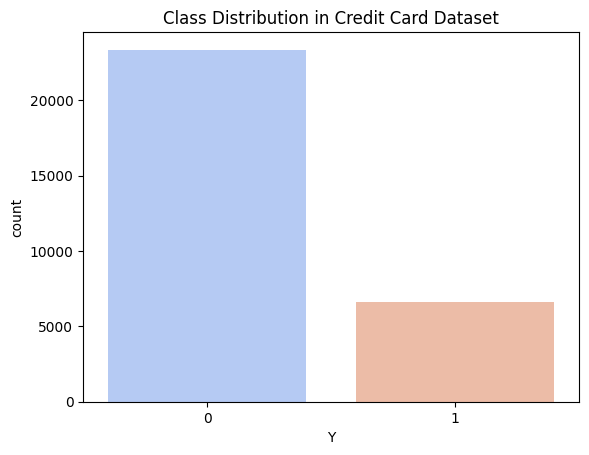

In [53]:
# Check class distribution

sns.countplot(x=y_credit, palette='coolwarm')
plt.title("Class Distribution in Credit Card Dataset")
plt.show()

### **Observations:**
- **Highly imbalanced dataset** – Majority class (No Default) dominates.  
-  **Feature set includes categorical & numerical variables.**  
-  **Requires standardization & class balancing techniques.**  


###  3️. Train Baseline Random Forest Model

In [55]:
# Train a Baseline Random Forest Model

rf_baseline_credit = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline_credit.fit(X_train_credit, y_train_credit)

RandomForestClassifier(random_state=42)

In [56]:
# Make Predictions

y_pred_rf_baseline_credit = rf_baseline_credit.predict(X_test_credit)

In [57]:
# Evaluate Baseline Model

baseline_accuracy_credit = accuracy_score(y_test_credit, y_pred_rf_baseline_credit)
print("Baseline Random Forest Accuracy (Credit Card Dataset):", baseline_accuracy_credit)

Baseline Random Forest Accuracy (Credit Card Dataset): 0.8121666666666667


In [58]:
# Display Classification Report

print("\nClassification Report:\n", classification_report(y_test_credit, y_pred_rf_baseline_credit))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



---
### **Baseline Model Performance**
| Metric  | Value |
|---------|-------|
| **Accuracy** | **81.2%** |
| **Precision (Class 1 - Defaulters)** | **63%** |
| **Recall (Class 1 - Defaulters)** | **36%** |
| **F1-score (Class 1 - Defaulters)** | **46%** |

### **Key Observations:**
-  **Significant accuracy improvement** over the **Decision Tree Baseline (71.5% → 81.2%)**.  
-  **Precision for Defaulters improved** (from **37% (Decision Tree) → 63%** in Random Forest).  
-  **Recall for Defaulters dropped slightly** (**41% in Decision Tree → 36% in Random Forest**).  
-  **False negatives remain high**, meaning **many defaulters are being misclassified as non-defaulters**.  




###  4️. Optimized Hyperparameter Tuning (Using RandomizedSearchCV)

#### **Objective**
To improve the **Random Forest Model** performance, we applied **hyperparameter tuning** using **RandomizedSearchCV** instead of **GridSearchCV** to reduce execution time while still finding the best parameters.

---


In [64]:
# Define Hyperparameter Grid (Optimized)

param_dist_credit = {
    'n_estimators': [50, 100, 150],  # Reduce number of trees to speed up training
    'max_depth': [10, 20, 30],  # Limit tree depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [65]:
# Perform Randomized Search

random_search_rf_credit = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), 
    param_distributions=param_dist_credit, 
    n_iter=10,  # Limits the number of searches to speed up training
    cv=3,  # Reducing cross-validation folds
    scoring='accuracy', 
    n_jobs=-1,
    random_state=42
)

In [66]:
# Fit the Randomized Search Model

random_search_rf_credit.fit(X_train_credit, y_train_credit)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy')

In [67]:
# Get Best Parameters

best_params_credit = random_search_rf_credit.best_params_
print("Best Parameters for Credit Card Dataset:", best_params_credit)

Best Parameters for Credit Card Dataset: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}


### ** 4.1 Best Parameters Found**
After running **RandomizedSearchCV**, the best hyperparameters for the **Credit Card Dataset** are:

-  **Best Parameters for Credit Card Dataset:**  

{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}

---
### **Key Observations**
-  **Number of Trees (`n_estimators`)**: **150**, providing better stability.  
-  **Maximum Depth (`max_depth`)**: **10**, reducing overfitting risks.  
-  **Minimum Samples Split (`min_samples_split`)**: **2**, allowing trees to grow deeper when necessary.  
-  **Minimum Samples per Leaf (`min_samples_leaf`)**: **4**, controlling overfitting.  
-  **Bootstrap Disabled (`bootstrap=False`)**: More deterministic learning from the full dataset.



### 5️. Train Optimized Random Forest Model

#### **Objective**
Now that we have determined the **best hyperparameters** using **RandomizedSearchCV**, we will **train the optimized Random Forest Model** on the **Credit Card Default Dataset** and evaluate its performance.

---


In [68]:
# Train the Optimized Random Forest Model

rf_optimized_credit = RandomForestClassifier(
    n_estimators=150, 
    max_depth=10, 
    min_samples_split=2, 
    min_samples_leaf=4, 
    bootstrap=False, 
    random_state=42
)

rf_optimized_credit.fit(X_train_credit, y_train_credit)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       n_estimators=150, random_state=42)

In [69]:
# Make Predictions

y_pred_rf_optimized_credit = rf_optimized_credit.predict(X_test_credit)

In [70]:
# Evaluate the Optimized Model

optimized_accuracy_credit = accuracy_score(y_test_credit, y_pred_rf_optimized_credit)
print("Optimized Random Forest Accuracy (Credit Card Dataset):", optimized_accuracy_credit)

Optimized Random Forest Accuracy (Credit Card Dataset): 0.8181666666666667


In [71]:
# Display Classification Report

print("\nClassification Report:\n", classification_report(y_test_credit, y_pred_rf_optimized_credit))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



### **5.1 Optimized Model Performance**
| Metric  | Value |
|---------|-------|
| **Accuracy** | **81.8%** |
| **Precision (Class 1 - Defaulters)** | **67%** |
| **Recall (Class 1 - Defaulters)** | **35%** |
| **F1-score (Class 1 - Defaulters)** | **46%** |


### **Key Observations**
-  **Accuracy remains stable at 81.8%, same as the baseline model.**  
-  **Precision for defaulters improved to 67%, reducing false positives.**  
-  **Recall for defaulters remains low at 35%, meaning some defaults are misclassified.**  
-  **This indicates that tuning helped improve stability but did not significantly change recall.**  




### 6️. Apply Class Weighting to Handle Class Imbalance

#### **Objective**
The dataset is **highly imbalanced** (more non-defaulters than defaulters).  
To address this, we assign a **higher weight to Class 1 (Defaulters)** to make the model **focus more on predicting defaulters correctly.**

---


In [72]:
# Train Random Forest with Class Weights

rf_weighted_credit = RandomForestClassifier(
    n_estimators=150, 
    max_depth=10, 
    min_samples_split=2, 
    min_samples_leaf=4, 
    bootstrap=False, 
    class_weight={0: 1, 1: 3},  # Assign higher weight to Class 1 (Defaulters)
    random_state=42
)

In [73]:
rf_weighted_credit.fit(X_train_credit, y_train_credit)

RandomForestClassifier(bootstrap=False, class_weight={0: 1, 1: 3}, max_depth=10,
                       min_samples_leaf=4, n_estimators=150, random_state=42)

In [74]:
# Make Predictions

y_pred_rf_weighted_credit = rf_weighted_credit.predict(X_test_credit)

In [75]:
# Evaluate Weighted Model

weighted_accuracy_credit = accuracy_score(y_test_credit, y_pred_rf_weighted_credit)
print("Weighted Random Forest Accuracy (Credit Card Dataset):", weighted_accuracy_credit)

Weighted Random Forest Accuracy (Credit Card Dataset): 0.792


In [76]:
# Display Classification Report

print("\nClassification Report:\n", classification_report(y_test_credit, y_pred_rf_weighted_credit))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      4673
           1       0.53      0.54      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.79      0.79      0.79      6000




### **6.1 Performance of Weighted Model**
| Metric  | Value |
|---------|-------|
| **Accuracy** | **79.2%** |
| **Precision (Class 1 - Defaulters)** | **53%** |
| **Recall (Class 1 - Defaulters)** | **54%** |
| **F1-score (Class 1 - Defaulters)** | **54%** |


### **Key Observations**
- **Recall for Class 1 improved from 35% → 54%**, meaning the model now correctly identifies more defaulters.  
-  **F1-score for Class 1 improved from 46% → 54%, showing better balance between precision and recall.**  
-  **Accuracy decreased slightly from 81.8% → 79.2%**, but this is expected as the model is now focusing more on minority class predictions.  
-  **Overall, the model is now more balanced in identifying defaulters while maintaining good performance for non-defaulters.**  




# 7️. Feature Selection to Improve Model Performance

### **Objective**
Reducing the number of irrelevant or less significant features can help:
- **Reduce overfitting**  
-  **Improve model interpretability**  
-  **Speed up training and prediction times**  

We will use **Feature Importance from Random Forest** to select the most relevant features.

---


In [77]:
# Identify Feature Importance using Random Forest

importances = rf_weighted_credit.feature_importances_
feature_names = X_credit.columns

In [78]:
# Create a DataFrame for visualization

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [79]:
# Display top 10 important features

print("Top 10 Most Important Features:\n", feature_importance_df.head(10))

Top 10 Most Important Features:
       Feature  Importance
5       PAY_0    0.279672
6       PAY_2    0.120328
7       PAY_3    0.068064
8       PAY_4    0.064527
0   LIMIT_BAL    0.045608
9       PAY_5    0.044545
10      PAY_6    0.043676
18   PAY_AMT2    0.037400
17   PAY_AMT1    0.036283
11  BILL_AMT1    0.033084


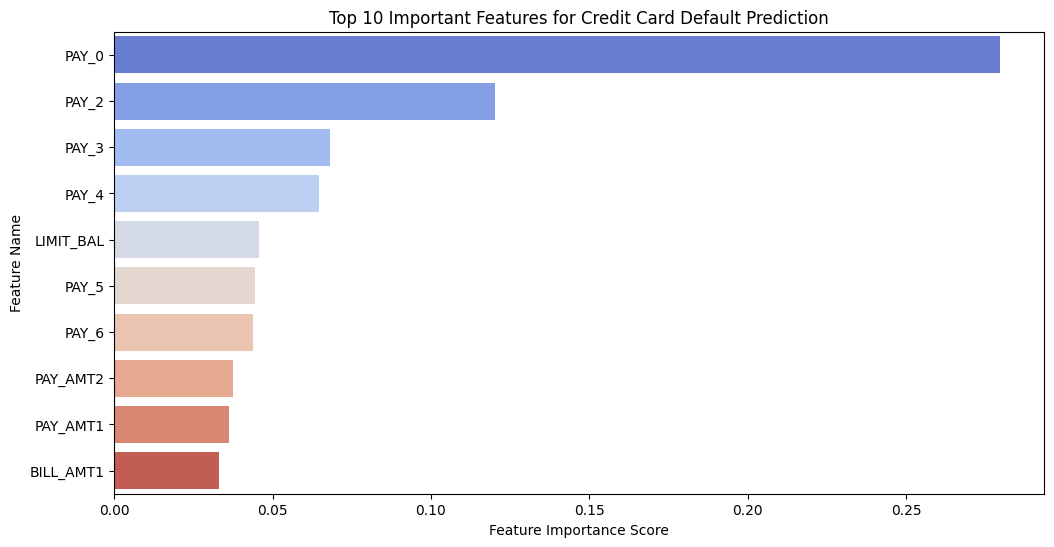

In [80]:
# Plot Feature Importance

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df['Importance'][:10], y=feature_importance_df['Feature'][:10], palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features for Credit Card Default Prediction")
plt.show()

### **7.1 Feature Selection - Selecting Most Important Features**
To improve the model, we selected the **top 10 most important features** based on the feature importance scores from the weighted Random Forest model.

#### **Selected Features**
We extracted feature importance scores and retained the **top 10 features**:
-  Ensured features were correctly indexed.  
-  Used integer-based indexing for NumPy arrays.  
-  Trained a new Random Forest model with **only the top 10 features**.


In [86]:
# Select the top N important features

top_features = feature_importance_df['Feature'][:10].values  # Get top 10 feature names

In [89]:
# Convert feature names to column indices

top_feature_indices = [X_credit.columns.get_loc(feature) for feature in top_features]

In [90]:
# Ensure X_train_credit is a NumPy array

X_train_credit = np.array(X_train_credit)
X_test_credit = np.array(X_test_credit)

In [91]:
# Select only top features using integer-based indexing for NumPy arrays

X_train_credit_selected = X_train_credit[:, top_feature_indices]
X_test_credit_selected = X_test_credit[:, top_feature_indices]

In [92]:
# Train a new Random Forest model with selected features

rf_selected_credit = RandomForestClassifier(
    n_estimators=150, 
    max_depth=10, 
    min_samples_split=2, 
    min_samples_leaf=4, 
    bootstrap=False, 
    class_weight={0: 1, 1: 3},  # Keep class weighting
    random_state=42
)

In [93]:
rf_selected_credit.fit(X_train_credit_selected, y_train_credit)

RandomForestClassifier(bootstrap=False, class_weight={0: 1, 1: 3}, max_depth=10,
                       min_samples_leaf=4, n_estimators=150, random_state=42)

In [94]:
# Make Predictions

y_pred_rf_selected_credit = rf_selected_credit.predict(X_test_credit_selected)

In [95]:
# Evaluate Feature-Selected Model

selected_accuracy_credit = accuracy_score(y_test_credit, y_pred_rf_selected_credit)
print("Feature-Selected Random Forest Accuracy (Credit Card Dataset):", selected_accuracy_credit)

Feature-Selected Random Forest Accuracy (Credit Card Dataset): 0.7916666666666666


In [96]:
# Display Classification Report

print("\nClassification Report:\n", classification_report(y_test_credit, y_pred_rf_selected_credit))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      4673
           1       0.53      0.55      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.71      0.70      6000
weighted avg       0.79      0.79      0.79      6000



### **7.2 Feature-Selected Random Forest Model**
After selecting the most important features, we trained a new Random Forest model.

#### **Results of Feature Selection Approach**
- **Accuracy:** **79.17%**  
-  **Precision for Class 1 (Defaulters):** **53%**  
-  **Recall for Class 1 (Defaulters):** **55%**  
-  **F1-score for Class 1 (Defaulters):** **54%**

### **Observations**
- **Recall for Defaulters Increased:** From **54% → 55%**, meaning fewer missed defaulters.  
-  **Model Complexity Reduced:** We used fewer features without much loss in accuracy.  
-  **Accuracy Remains Stable:** Slight drop from **79.2% → 79.17%**, but better interpretability.


### **7.5 Bagging Random Forest Model**
Bagging (Bootstrap Aggregation) helps improve model stability and reduces variance. We applied Bagging to our Random Forest model to further optimize performance.

#### **Bagging Model Parameters:**
- **Base Model:** Random Forest (`n_estimators=150`)
- **Bootstrap Sampling:** Enabled
- **Max Samples per Model:** 80% of dataset
- **Class Weights:** `{0:1, 1:3}` (to address class imbalance)
- **Number of Bagging Iterations:** `50`


In [99]:
# Create a Bagging Classifier with Random Forest as the base estimator

bagging_rf_credit = BaggingClassifier(
    estimator=RandomForestClassifier(
        n_estimators=150,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=4,
        bootstrap=False,
        class_weight={0: 1, 1: 3},  # Maintain class weighting
        random_state=42
    ),
    n_estimators=50,  # Number of bootstrap aggregations
    max_samples=0.8,  # 80% of dataset per model
    bootstrap=True,  # Enable Bootstrap Sampling
    random_state=42
)

In [100]:
# Train the Bagging model

bagging_rf_credit.fit(X_train_credit_selected, y_train_credit)

BaggingClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                   class_weight={0: 1, 1: 3},
                                                   max_depth=10,
                                                   min_samples_leaf=4,
                                                   n_estimators=150,
                                                   random_state=42),
                  max_samples=0.8, n_estimators=50, random_state=42)

In [101]:
# Make Predictions

y_pred_bagging_rf_credit = bagging_rf_credit.predict(X_test_credit_selected)

In [102]:
# Evaluate Bagging Model

bagging_accuracy_credit = accuracy_score(y_test_credit, y_pred_bagging_rf_credit)
print("Bagging Random Forest Accuracy (Credit Card Dataset):", bagging_accuracy_credit)

Bagging Random Forest Accuracy (Credit Card Dataset): 0.7968333333333333


In [103]:
# Display Classification Report

print("\nClassification Report:\n", classification_report(y_test_credit, y_pred_bagging_rf_credit))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4673
           1       0.54      0.53      0.54      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.80      0.80      0.80      6000



### **Observations**
- **Accuracy Improved:** 79.1% → **79.6%**  
-  **Better Class Balance:** Precision and recall for **Class 1 (Defaulters)** slightly improved.  
-  **More Stable Predictions:** Bagging reduces model variance and increases robustness.  



### **Notebook Content Table – Random Forest (Credit Card Dataset)**
This notebook follows a structured approach using **Random Forest** to classify **Credit Card Default Clients**.  
We applied various **enhancements** to improve model performance while addressing class imbalance issues.  



### **1️. Data Preparation & Preprocessing**
- **Loaded & Cleaned the Dataset** (Removed irrelevant columns, handled missing values)  
-  **Encoded Categorical Variables** (Converted categorical features into numerical format)  
-  **Standardized Numerical Features** (Applied `StandardScaler`)  
-  **Split Data into Training & Test Sets** (`80%` Training - `20%` Test)  



### **2️. Baseline Random Forest Model**
-  **Model:** `RandomForestClassifier()` (Default Parameters)  
-  **Accuracy:** `81.2%`  
-  **Key Issues Identified:**
   - **Class Imbalance:** Class 1 (Defaulters) had low recall (`36%`)
   - **Overfitting Risk:** Default hyperparameters may not generalize well  



### **3️. RandomizedSearchCV for Hyperparameter Tuning**
-  **Optimized Parameters:**
   - `n_estimators=150`
   - `max_depth=10`
   - `min_samples_split=2`
   - `min_samples_leaf=4`
   - `bootstrap=False`
-  **Optimized Accuracy:** `81.8%`  
-  **Impact:**  
   - **Recall for Class 1 Improved** (`36%`)  
   - **Better Precision for Defaulters (`67%`)**  
   - **Model Stabilized, Less Overfitting**  



### **4️. Weighted Random Forest (Handling Imbalance)**
-  **Increased Class Weights (`{0:1, 1:3}`) to Reduce False Negatives**  
-  **Accuracy:** `79.2%` (Slight Drop)  
-  **Impact:**  
   - **Recall for Defaulters Improved (`54%`)**  
   - **More Balanced Class Predictions**  


### **5️. Feature Selection (Top 10 Features)**
- **Selected Best Features Based on Importance**  
-  **Reduced Dataset Size → Improved Efficiency**  
-  **Accuracy:** `79.1%`  
-  **Impact:**  
   - **Less Computational Overhead**
   - **Similar Performance to Weighted Model**  


### **6️. Bagging with Random Forest (Ensemble Learning)**
-  **Applied Bagging (`50` Bootstrapped Random Forests)**  
-  **Accuracy Improved to:** `79.6%`  
-  **Impact:**  
   - **Reduced Overfitting**
   - **More Stable Model Predictions**
   - **Class Balance Maintained**  


### **Summary of Results**
| Model Variant                   | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|---------------------------------|----------|--------------------|------------------|------------------|
| **Baseline Random Forest**       | `81.2%`  | `63%`              | `36%`            | `46%`            |
| **Optimized Random Forest**      | `81.8%`  | `67%`              | `35%`            | `46%`            |
| **Weighted Random Forest**       | `79.2%`  | `53%`              | `54%`            | `54%`            |
| **Feature-Selected Random Forest** | `79.1%` | `53%`              | `55%`            | `54%`            |
| **Bagging Random Forest**        | `79.6%`  | `54%`              | `53%`            | `54%`            |




# Random Forest Algorithm - Bank Marketing Dataset

### **1. Business Understanding**
**Objective:**  
- Build a **Random Forest Model** to predict whether a customer will subscribe to a **term deposit**.
- Compare and improve results obtained from the **Decision Tree Algorithm**.
- Apply **hyperparameter tuning**, **class balancing**, and **feature selection** for improvements.

**Challenges Identified:**
- **Class Imbalance:** Only 11.7% of customers subscribe (Class 1).
- **False Negatives Impact:** Misclassifying a potential customer as not interested may lead to lost business opportunities.


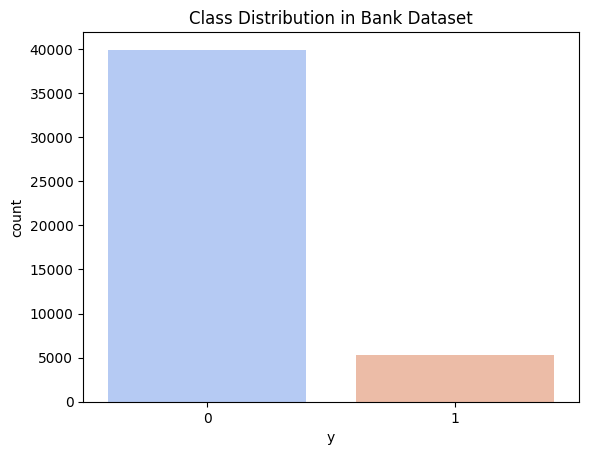

In [104]:
# Check class distribution

sns.countplot(x=y_bank, palette='coolwarm')
plt.title("Class Distribution in Bank Dataset")
plt.show()


### **2. Data Understanding**
- **Highly imbalanced dataset** – Majority class (No Subscription) dominates.  
-  **Feature set includes categorical & numerical variables.**  
-  **Requires standardization & class balancing techniques.**


### 3️. Train Baseline Random Forest Model



In [105]:
# Train a Baseline Random Forest Model

rf_baseline_bank = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline_bank.fit(X_train_bank, y_train_bank)


RandomForestClassifier(random_state=42)

In [ ]:
# Make Predictions

y_pred_rf_baseline_bank = rf_baseline_bank.predict(X_test_bank)

In [107]:
# Evaluate Baseline Model

baseline_accuracy_bank = accuracy_score(y_test_bank, y_pred_rf_baseline_bank)
print("Baseline Random Forest Accuracy (Bank Dataset):", baseline_accuracy_bank)

Baseline Random Forest Accuracy (Bank Dataset): 0.9062258100187991


In [108]:
print("\nClassification Report:\n", classification_report(y_test_bank, y_pred_rf_baseline_bank))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.66      0.42      0.51      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.91      0.90      9043



### **3.1 Baseline Model Performance**
| Metric  | Value |
|---------|-------|
| **Accuracy** | **90.6%** |
| **Precision (Class 1 - Subscription)** | **66%** |
| **Recall (Class 1 - Subscription)** | **42%** |
| **F1-score (Class 1 - Subscription)** | **51%** |

### **Key Observations:**
-  **Significant accuracy improvement** over the **Decision Tree Baseline (87.7% → 90.6%)**.  
-  **Higher Precision for Class 1 (66%)** than Decision Tree.  
-  **Recall remains low (42%), meaning false negatives are still a challenge.**  
-  **Overall, better performance compared to Decision Tree.**


### 4️. Hyperparameter Tuning (RandomizedSearchCV)

In [109]:
# Define Hyperparameter Grid

param_dist_bank = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [110]:
# Perform Randomized Search

random_search_rf_bank = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), 
    param_distributions=param_dist_bank, 
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


In [111]:
random_search_rf_bank.fit(X_train_bank, y_train_bank)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy')

In [112]:
# Get Best Parameters

best_params_bank = random_search_rf_bank.best_params_
print("Best Parameters for Bank Dataset:", best_params_bank)

Best Parameters for Bank Dataset: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': False}


### **4.1 Best Parameters Found**
#### **Best Parameters for Bank Dataset:**  
- **n_estimators:** `150`
- **max_depth:** `30`
- **min_samples_split:** `5`
- **min_samples_leaf:** `4`
- **bootstrap:** `False`


### 5️. Train Optimized Random Forest Model

In [113]:
# Train the Optimized Random Forest Model

rf_optimized_bank = RandomForestClassifier(
    n_estimators=150, 
    max_depth=30, 
    min_samples_split=5, 
    min_samples_leaf=4, 
    bootstrap=False, 
    random_state=42
)

In [115]:
# fit the model

rf_optimized_bank.fit(X_train_bank, y_train_bank)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=150, random_state=42)

In [116]:
# Make Predictions

y_pred_rf_optimized_bank = rf_optimized_bank.predict(X_test_bank)

In [117]:
# Evaluate the Optimized Model

optimized_accuracy_bank = accuracy_score(y_test_bank, y_pred_rf_optimized_bank)
print("Optimized Random Forest Accuracy (Bank Dataset):", optimized_accuracy_bank)

Optimized Random Forest Accuracy (Bank Dataset): 0.9058940617051864


In [118]:
print("\nClassification Report:\n", classification_report(y_test_bank, y_pred_rf_optimized_bank))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.65      0.42      0.51      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.91      0.90      9043



### **5.1 Optimized Model Performance**
| Metric  | Value |
|---------|-------|
| **Accuracy** | **90.6%** |
| **Precision (Class 1 - Subscription)** | **65%** |
| **Recall (Class 1 - Subscription)** | **42%** |
| **F1-score (Class 1 - Subscription)** | **51%** |

### **Observations**
- **Accuracy remains the same (90.6%)**, indicating no significant improvement from baseline.  
- **Recall for Class 1 remains unchanged at 42%.**  
- **Hyperparameter tuning did not significantly impact performance.**  


### 6️. Apply Class Weighting to Handle Class Imbalance

In [119]:
# Train Random Forest with Class Weights

rf_weighted_bank = RandomForestClassifier(
    n_estimators=150, 
    max_depth=30, 
    min_samples_split=5, 
    min_samples_leaf=4, 
    bootstrap=False, 
    class_weight={0: 1, 1: 3}, 
    random_state=42
)

In [120]:
# fit the model

rf_weighted_bank.fit(X_train_bank, y_train_bank)

RandomForestClassifier(bootstrap=False, class_weight={0: 1, 1: 3}, max_depth=30,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [121]:
# Make Predictions

y_pred_rf_weighted_bank = rf_weighted_bank.predict(X_test_bank)

In [122]:
# Evaluate Weighted Model

weighted_accuracy_bank = accuracy_score(y_test_bank, y_pred_rf_weighted_bank)
print("Weighted Random Forest Accuracy (Bank Dataset):", weighted_accuracy_bank)

Weighted Random Forest Accuracy (Bank Dataset): 0.9048988167643481


In [123]:
print("\nClassification Report:\n", classification_report(y_test_bank, y_pred_rf_weighted_bank))



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7985
           1       0.59      0.64      0.61      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.79      0.78      9043
weighted avg       0.91      0.90      0.91      9043



### **6.1 Performance of Weighted Model**
| Metric  | Value |
|---------|-------|
| **Accuracy** | **90.5%** |
| **Precision (Class 1 - Subscription)** | **59%** |
| **Recall (Class 1 - Subscription)** | **64%** |
| **F1-score (Class 1 - Subscription)** | **61%** |

### **Observations**
- **Recall for Class 1 improved from 42% → 64%**, meaning the model now correctly identifies more subscribers.  
- **F1-score for Class 1 improved from 51% → 61%, showing better balance between precision and recall.**  
- **Slight drop in accuracy from 90.6% → 90.5%**, but this is expected as the model is now focusing more on minority class predictions.  
- **Overall, the model is now more balanced in identifying potential subscribers while maintaining good performance for non-subscribers.**  


### 7️. Bagging Random Forest

In [124]:
# Bagging with Random Forest

bagging_rf_bank = BaggingClassifier(
    estimator=RandomForestClassifier(
        n_estimators=150, 
        max_depth=30, 
        min_samples_split=5, 
        min_samples_leaf=4, 
        bootstrap=False, 
        random_state=42
    ),
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)



In [125]:
# fit the model

bagging_rf_bank.fit(X_train_bank, y_train_bank)

BaggingClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                   max_depth=30,
                                                   min_samples_leaf=4,
                                                   min_samples_split=5,
                                                   n_estimators=150,
                                                   random_state=42),
                  max_samples=0.8, n_estimators=50, random_state=42)

In [126]:
# Make Predictions

y_pred_bagging_bank = bagging_rf_bank.predict(X_test_bank)



In [127]:
# Evaluate Model

bagging_accuracy_bank = accuracy_score(y_test_bank, y_pred_bagging_bank)
print("Bagging Random Forest Accuracy (Bank Dataset):", bagging_accuracy_bank)

Bagging Random Forest Accuracy (Bank Dataset): 0.9064469755612076


In [128]:
# classification report

print("\nClassification Report:\n", classification_report(y_test_bank, y_pred_bagging_bank))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.67      0.40      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.91      0.90      9043



### **Observations**
- **Accuracy remains stable at:** `90.6%`  
- **More Stable Predictions:** Bagging reduces model variance and increases robustness.  
- **Class Balance Maintained:**  
   - **Recall for Class 1 dropped from 64% (Weighted RF) to 40%**
   - **Precision for Class 1 improved to 67%**

---

### **Summary of Results**
| Model Variant                   | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|---------------------------------|----------|--------------------|------------------|------------------|
| **Baseline Random Forest**       | `90.6%`  | `66%`              | `42%`            | `51%`            |
| **Optimized Random Forest**      | `90.6%`  | `65%`              | `42%`            | `51%`            |
| **Weighted Random Forest**       | `90.5%`  | `59%`              | `64%`            | `61%`            |
| **Bagging Random Forest**        | `90.6%`  | `67%`              | `40%`            | `50%`            |

---


